<a href="https://colab.research.google.com/github/Ziqing-WU/Linear_Model/blob/main/Mod%C3%A8lelin%C3%A9aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Examen 2020 - Modèle linéaire** \\
Shuang Hou, Ziqing Wu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Exercice 1 
>Nous souhaitons maintenant évaluer si un nouveau traitement a un effet significatif sur l'efficacité d'un moteur en fonction de son âge.  

Tout d'abord, on importe les données en utilisant pandas. Pour avoir une première idée des données, on affiche les premières lignes de dataframe.

In [ ]:
dataframe=pd.read_csv("./Observations_2.csv",sep=' ')
dataframe.head()

,Treatment,Age,Efficiency
0,Standard,3.9479,3.2224
1,Standard,1.7838,1.5127
2,Standard,7.4415,4.3736
3,Standard,8.5625,5.2151
4,Standard,9.8002,5.4256


## QUESTION 1.1 
>Lisez le fichier Observations_2.csv qui contient les données, traitez les et representez les avec :
*   'Age' en abscisse
*   'Efficiency' en ordonnée
*    Les observations avec le traitement standard (Standard) en bleu
*    Les observations avec le nouveau traitement (Tested) en rouge. 
<br>A la vue du graphe, vous semble-t-il y avoir un effet ?

In [ ]:
set(dataframe["Treatment"])

{'Standard', 'Tested'}

On voit que les types de traitement contient bien la méthode classique, dite "standard", et la nouvelle méthode, dite "tested". Pour tracer les points de ces deux types de traitement, on fait une opération "group by" pour avoir les deux data sets.

In [ ]:
standard = dataframe.groupby("Treatment").get_group("Standard")
tested = dataframe.groupby("Treatment").get_group("Tested")

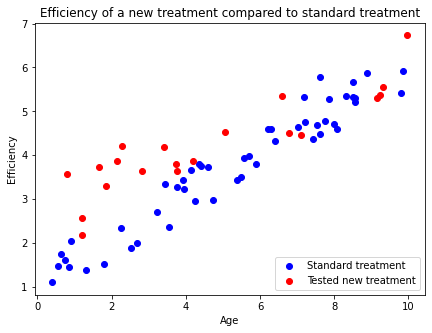

In [ ]:
# Display the figure
fig, ax = plt.subplots(figsize=(7, 5))
plt.xlabel("Age")
plt.ylabel("Efficiency")
plt.title("Efficiency of a new treatment compared to standard treatment")
ax.scatter(standard["Age"], standard["Efficiency"], c='b', label = 'Standard treatment')
ax.scatter(tested["Age"], tested["Efficiency"], c = 'r', label = 'Tested new treatment')
plt.legend(loc = 'lower right')

Sur le graphe, on constate que les points bleus sont légèrement plus "hauts" que les points rouges. Ceci est plus évident quand l'âge du moteur est plus petit. Cette observation signifie que le nouveau traitement est plus efficace que le traitement classique au moins pour une plage des âges. On dirait que le nouveau traitement a un effet globalement.

## QUESTION 1.2
>On supposera qu'il existe une relation linéaire entre l'âge du moteur et son niveau d'efficacité a un bruit Gaussien près. Utilisez un modèle de type régression linéaire pour mettre en lien les données. Utilisez ensuite un test statistique pour evaluer si l'impact du traitement est significatif.

In [ ]:
from sklearn.linear_model import LinearRegression
# Linear regression fit for two sub data sets
lr_s = LinearRegression()
lr_s.fit(standard["Age"][:, np.newaxis], standard["Efficiency"])
lr_t = LinearRegression()
lr_t.fit(tested["Age"][:, np.newaxis], tested["Efficiency"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


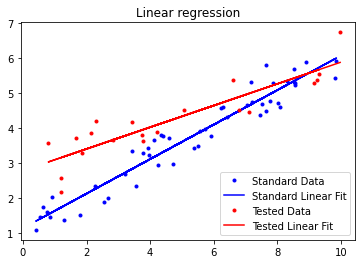

In [ ]:
fig = plt.figure()
plt.plot(standard["Age"], standard["Efficiency"], 'b.')
plt.plot(standard["Age"], lr_s.predict(standard["Age"][:, np.newaxis]), 'b-')
plt.plot(tested["Age"], tested["Efficiency"], 'r.')
plt.plot(tested["Age"], lr_t.predict(tested["Age"][:, np.newaxis]), 'r-')
plt.legend(('Standard Data', 'Standard Linear Fit', 'Tested Data', 'Tested Linear Fit'), loc='lower right')
plt.title('Linear regression')
plt.show()


On a fait une régression linéaire pour les deux data sets respectivement. Selon le graph ci-dessus, on constate que les résultats de régression sont différents. Pour mettre en évidence l'effet du nouveau traitement, on fait un test statistique sur les estimations des coefficients $b_0$ et $b_1$.

D'abord, on note les estimations des deux coefficients du modèle linéaire $b^s_0$ et $b^s_1$ pour le traitement standard, puis $b^t_0$ et $b^t_1$ pour le traitement testé. Le test statistique est pour objectif de montre qu'il y a une différence significative entre ces deux modèles linéaires. L'hypothèse nulle est donc qu'il n'y a pas de l'impact du changement de traitement, c'est-à-dire $b^s_0=b^t_0$ et $b^s_1=b^t_1$. L'hypothèse alternative est que l'impact du traitement est significatif. Pour effectuer ce test, le test de Chow peut être utilisé [[Chow, 1960](http://pdfs.semanticscholar.org/0f70/219160c8ad2f9db02e226d3f7d7320e729b8.pdf)].

La statistique du test est égale à $$F = \frac{(S_C-(S_s + S_t))/k}{(S_s + S_t)/(N_s+N_t-2k)}$$ où $S_C$ est la somme des carrés des résidus estimés du modèle complet (l'ensemble de deux groupes traitement standard et testé), $S_s$ et $S_t$ sont les sommes des carrés des résidus estimés du groupe traitement standard et testé respectivement. Les valeurs $N_s$ et $N_t$ représentent le nombre d'observations dans chaque groupe et $k$ est le nombre total de paramétres à estimer (2 dans notre cas). 

Cette statistique suit une lois de Fisher avec $\nu_1=k$ et $\nu_2 = N_s+N_t-2k$ degré de liberté.

On ne distingue plus les traitements différents puis on fait une régression linéaire du modèle complet.

In [ ]:
# Linear regression fit for whole data set
lr_c = LinearRegression()
lr_c.fit(dataframe['Age'][:, np.newaxis], dataframe['Efficiency'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Calculation of S_C, S_s, S_t
S_C = np.sum(np.power(lr_c.predict(dataframe['Age'][:,np.newaxis])-dataframe['Efficiency'],2.))
S_s = np.sum(np.power(lr_s.predict(standard['Age'][:,np.newaxis])-standard['Efficiency'],2.))
S_t = np.sum(np.power(lr_t.predict(tested['Age'][:,np.newaxis])-tested['Efficiency'],2.))
S_C, S_s, S_t

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


(22.966420270400498, 6.443704876065376, 4.432115226517338)

In [ ]:
# Calculation of N_s, N_t
N_s = standard.shape[0]
N_t = tested.shape[0]
N_s, N_t

(50, 20)

In [ ]:
# Calculation of F
F = ((S_C - (S_s + S_t))/2) / ((S_s + S_t)/(N_s + N_t - 4))
F

36.68595119950885

In [ ]:
# Calculation of p-value
from scipy.stats import f
dfn, dfd = 2, 66
p = 1 - f.cdf(F, dfn, dfd)
p

1.9371726445172044e-11

On a obtenu une p-valeur qui est $1,94\times10^{-11}$. Avec cette p-valeur beaucoup plus petite que 0,001, on peut rejeter l'hypothèse nulle, c'est-à-dire, on peut confirmer que l'impact du traitement est significatif avec une confidence statistique de 99.9%.

# Exercice 2 
>Nous souhaitons développer une méthode de type apprentissage automatique qui quantifie en temps réel le risque de collision d'un drône avec des objets environnants.
<br>
<br>Pour y arriver, nous avons embarqué 18 capteurs sur un drône en phase de test. Un expert
a alors quantifié à plusieurs instants son risque de collision avec un autre objet.
<br>Un total de 67 observations labellisées ont été enregistrées dans le fichier 'Observations_1.csv'.
<br>
<br>Nous allons évaluer dans cet exercice si ces observations nous permettent de mettre en lien les données capteurs avec le niveau de risque. Nous allons aussi évaluer si nous aurions une bonne performance avec un sous ensemble pertinent des capteurs. Chaque capteur a en effet un poids non négligeable et à besoin d'énergie pour fonctionner, ce qui a un impact sur le temps d'utilisation du drone entre deux rechargements de ses batteries.  

In [282]:
dataframe=pd.read_csv("./Observations_1.csv",sep=';')

dataframe.head()

,Feature_01,Feature_02,Feature_03,Feature_04,Feature_05,Feature_06,Feature_07,Feature_08,Feature_09,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Risk_level
0,11.6,6.4,4.3,7.2,14.4,19.26,39.32,50.00,13.040000,0.20,0.0440,-1.578984,2.209,9.02,0.26,94.285053,3.56,16.91,6
1,15.5,10.5,4.9,6.9,13.7,8.57,36.78,22.57,18.713333,0.51,0.8501,-2.497499,0.339,22.43,0.10,86.766527,7.06,-3.47,6
2,15.3,6.5,4.2,6.4,13.6,13.48,25.90,8.25,8.246667,0.27,0.9629,-3.638758,0.339,17.94,0.13,107.336147,3.20,10.05,10
3,13.4,7.7,4.1,5.8,14.2,15.23,44.36,11.09,11.093333,0.67,-0.2756,-6.273760,1.611,11.38,0.20,136.516384,4.33,-3.62,18
4,16.0,5.2,3.2,5.7,12.8,8.37,19.62,7.44,6.386667,0.24,-0.6928,-2.096575,0.659,8.56,0.27,88.774469,4.57,1.56,7


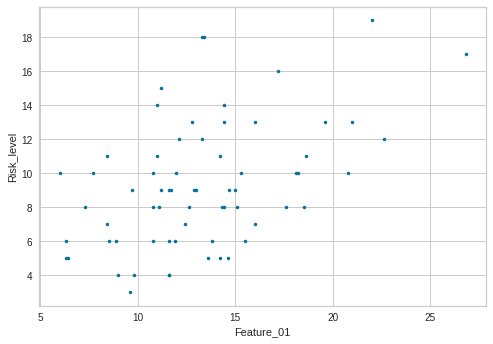

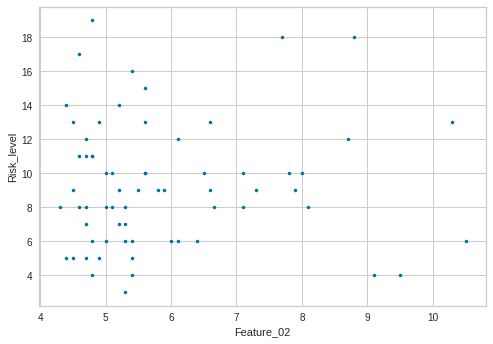

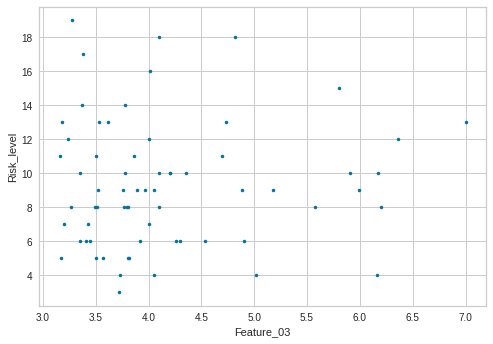

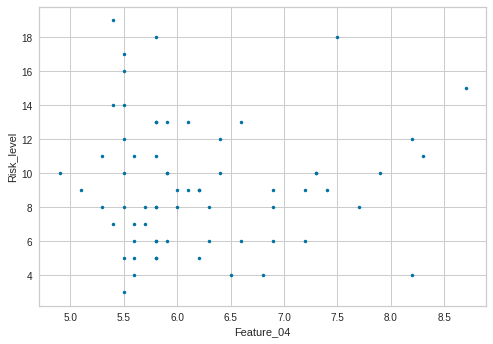

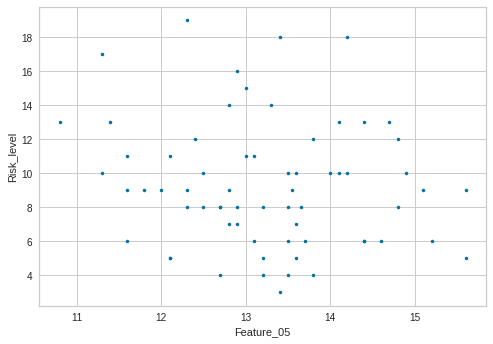

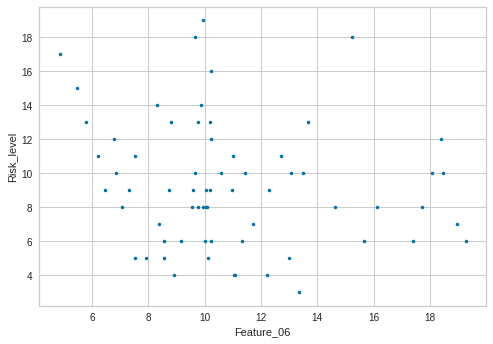

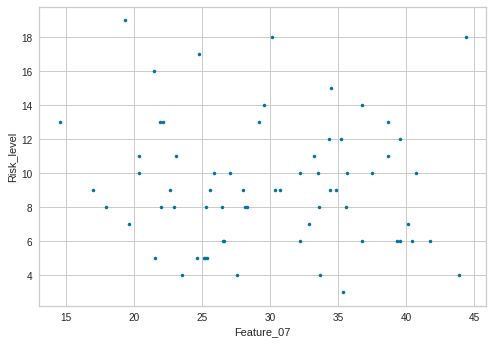

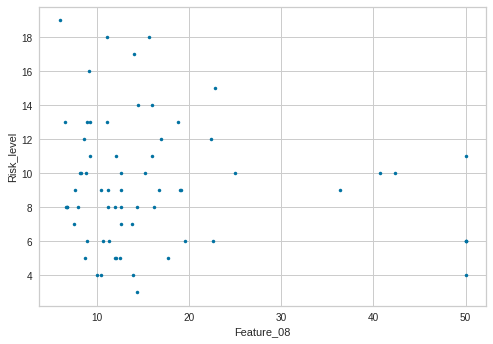

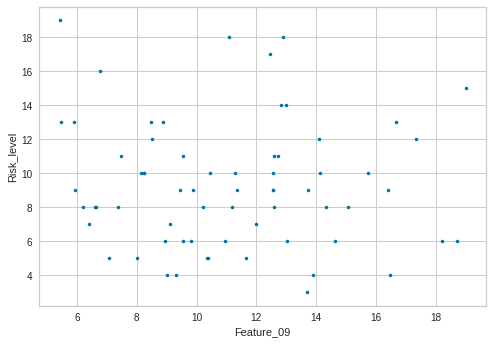

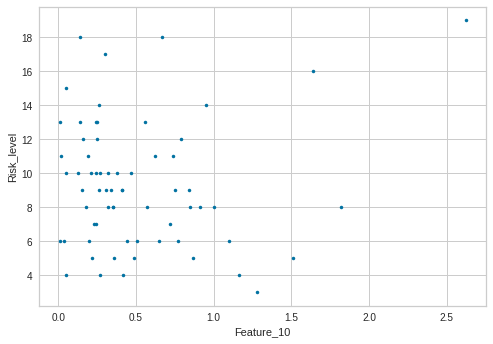

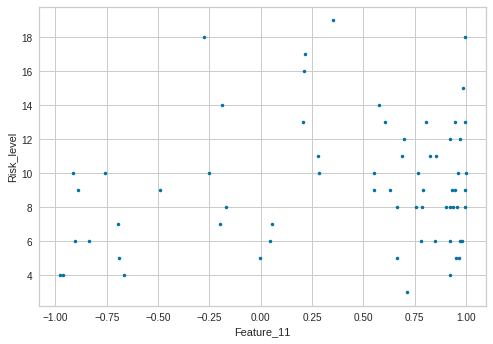

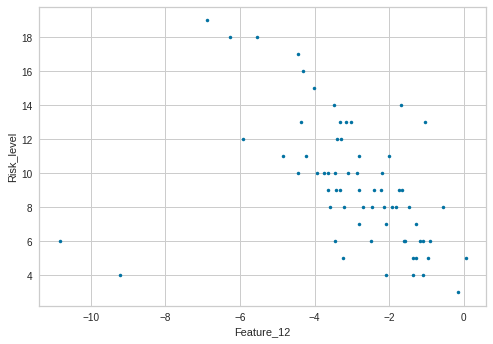

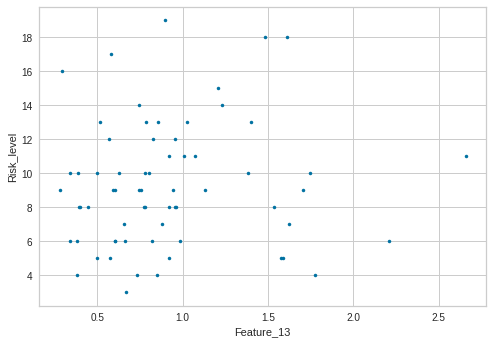

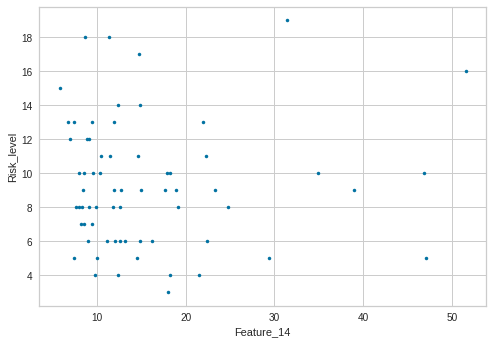

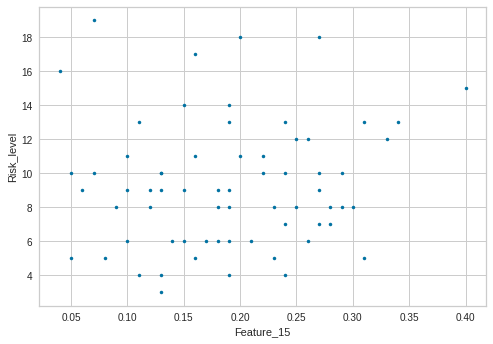

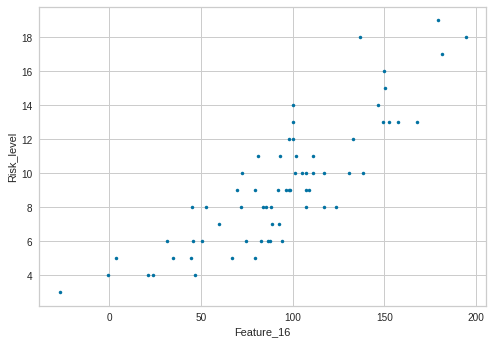

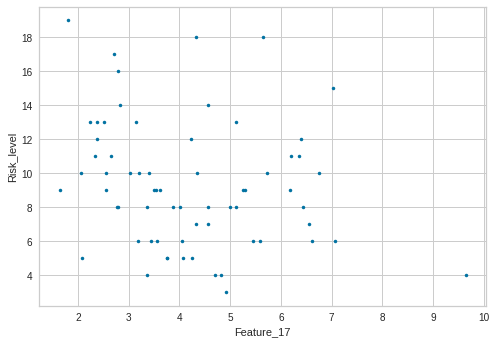

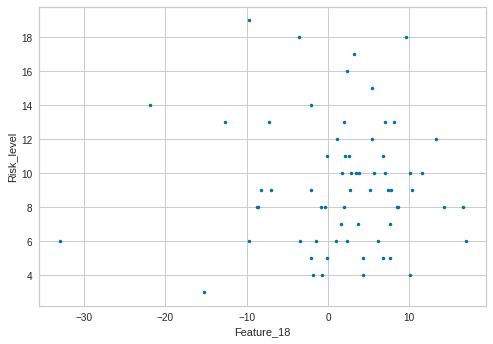

In [283]:
listColNames=list(dataframe.columns)


XY=dataframe.values
ColNb_Y=listColNames.index('Risk_level')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only


for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Risk_level')
  plt.show()

##QUESTION 2.1 
>Observez les données unes par unes. Est-ce que vous identifiez visuellement des liens entre certaines variables et la variable 'Risk_level'. Si oui, lesquels ?

Selons les graphs tracés, on constate qu'il y a trois variables qui ont une corrélation linéaire avec la variable 'Risk_level'.

Les variables 'Feature_16' et 'Feature_01' ont une corrélation linéaire positive avec la variable 'Risk_level'. En plus, la linéarité de 'Feature_16' est plus forte que celle de 'Feature_01', on pourrait supposer que le coefficient de détermination de 'Feature_16' est plus grand (proche de 1).

La variable 'Feature_12' a une forte corrélation linéaire négative avec 'Risk_level'.


##QUESTION 2.2 
>On se demande s'il est possible de prédire le niveau de 'Risk_level' à partir d'une seule des variables 'Feature_01', 'Feature_07' ou 'Feature_16'. 

### QUESTION 2.2.1
>Effectuez une régression linéaire simple entre 'Risk_level' et chacune de ces variables.  Toutes les données seront utilisées. Evaluez alors la qualité des prédictions sur toutes les données à l'aide de la moyenne de l'erreur de prediction au carré (MSE). Quel est le risque potentiel en utilisant cette stratégie de validation de l'apprentissage ? 

{'boxes': [<matplotlib.lines.Line2D at 0x7f925749af98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9257482588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f925746b048>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9257482c88>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f925749a940>,
  <matplotlib.lines.Line2D at 0x7f925755a4a8>]}

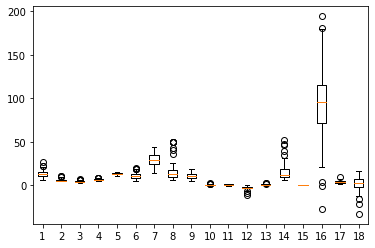

In [ ]:
plt.boxplot(X)

Avec le boxplot, on constate qu'il existe une grande variabilité sur les données. C'est pertinent de prétraiter les données avant rentrer dans l'analyse. On centre et réduit la matrice X pour éliminer cette variabilité.

{'boxes': [<matplotlib.lines.Line2D at 0x7f92574cb860>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92574d72b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f92574d7d30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f92574d79b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f92574cbb70>,
  <matplotlib.lines.Line2D at 0x7f925750d1d0>]}

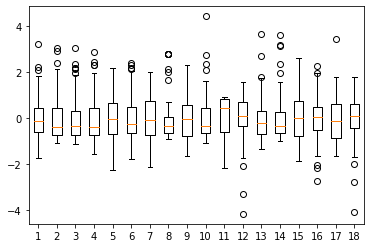

In [ ]:
X_scaled = preprocessing.scale(X)
plt.boxplot(X_scaled)

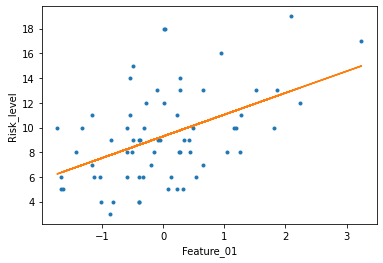

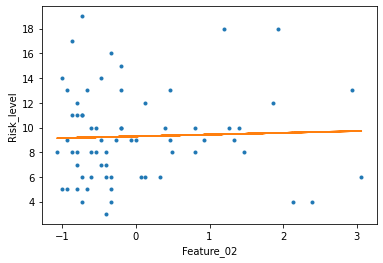

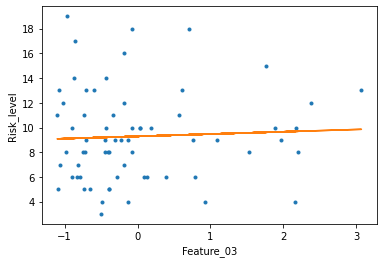

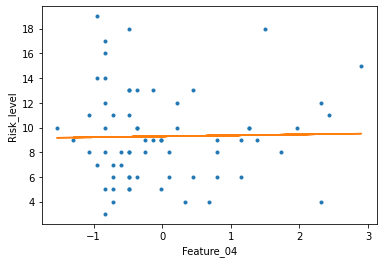

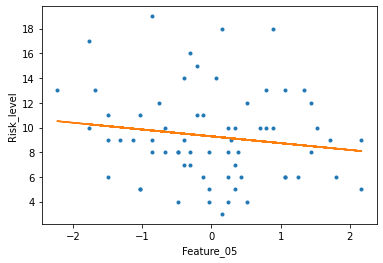

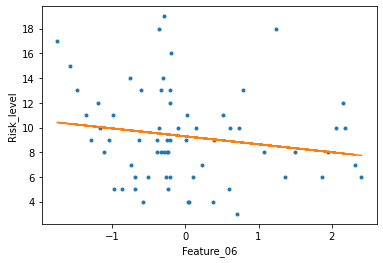

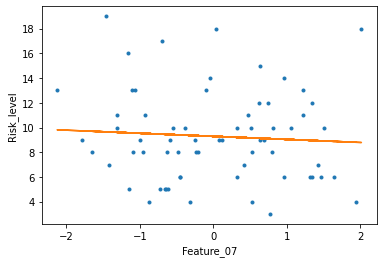

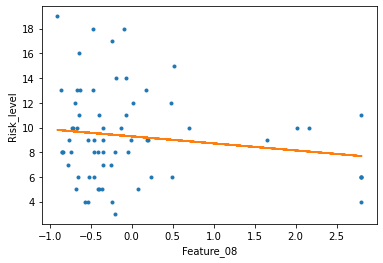

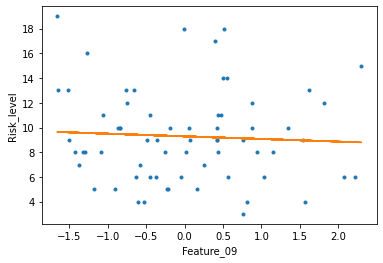

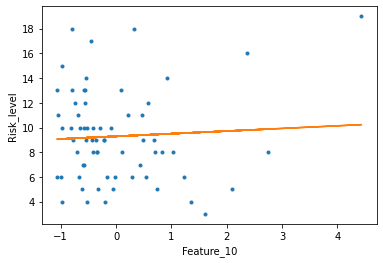

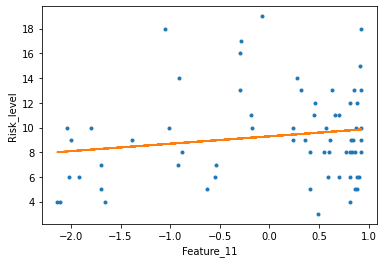

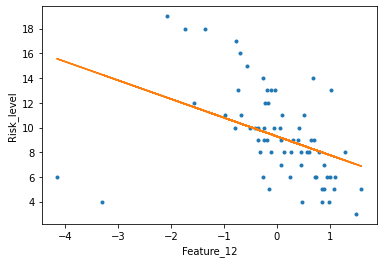

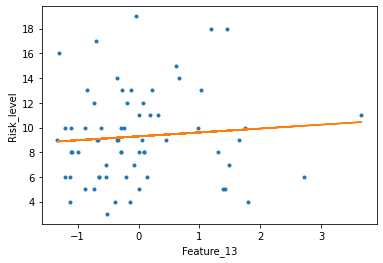

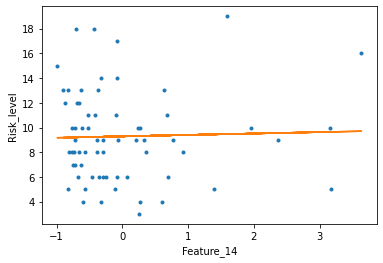

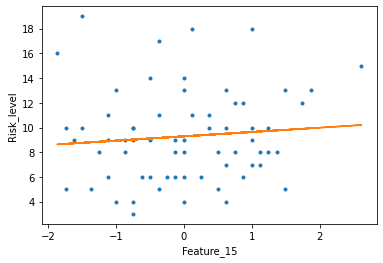

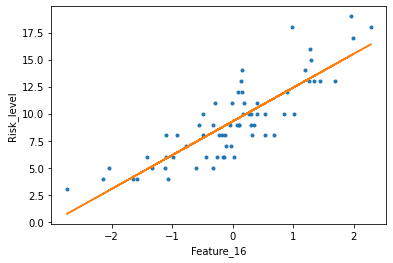

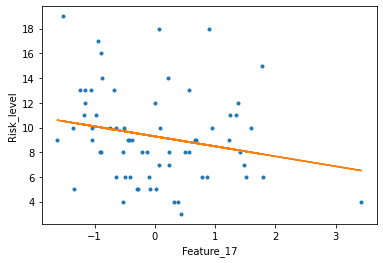

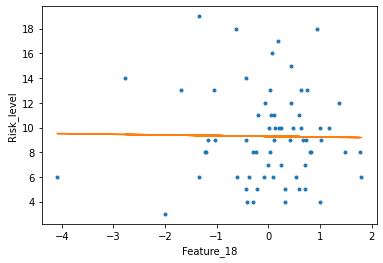

MSE = [10.480923895867484, 13.548795843877869, 13.5345229904373, 13.563010428302752, 13.264848672811542, 13.155466009777175, 13.506926344682194, 13.24380613663832, 13.523200532992492, 13.523335021468023, 13.209819579772201, 11.285264479808852, 13.469672989882401, 13.555759088865793, 13.445766642256862, 3.833346710573031, 12.914015422070385, 13.565629618194627]
b_0 = [9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787, 9.287878787878787]
b_1 = [1.7571901033004673, 0.14087267700559175, 0.18471048851457303, 0.07503683563318052, -0.5511735499759126, -0.6427868583188494, -0.248424254698285, -0.5699428202603044, -0.21316759137377772, 0.21285190517486213, 0.5990170074650564, -1.5110845360851712, 0.31459174356964686, 0.11349830

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = []
b_0 = []
b_1 = []
for Col in range(len(listColNames)):
  lr = LinearRegression();
  lr.fit(X_scaled[:, Col:Col+1], Y[:]);
  MSE.append(mean_squared_error(Y[:], lr.predict(X_scaled[:, Col:Col+1])))
  b_0.append(lr.intercept_[0])
  b_1.append(lr.coef_[0][0])
  plt.plot(X_scaled[:,Col],Y[:],'.')
  plt.plot(X_scaled[:,Col],lr.predict(X_scaled[:, Col:Col+1]),'-')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Risk_level')
  plt.show()

print("MSE = " + str(MSE) )
print("b_0 = " + str(b_0))
print("b_1 = " + str(b_1))
  

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

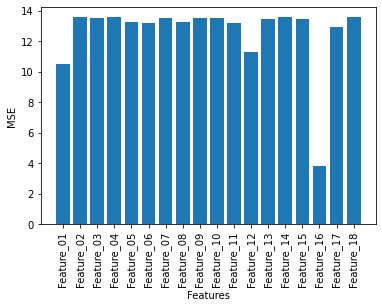

In [ ]:
plt.bar(listColNames,MSE)
plt.xlabel('Features')
plt.ylabel('MSE')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

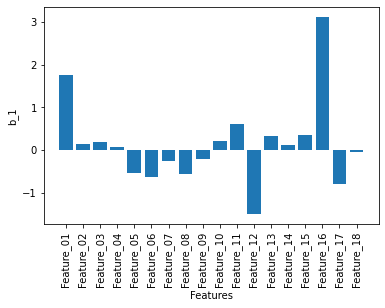

In [ ]:
plt.bar(listColNames,b_1)
plt.xlabel('Features')
plt.ylabel('b_1')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

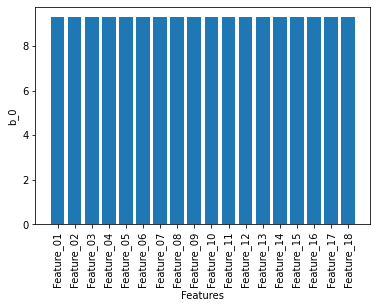

In [ ]:
plt.bar(listColNames,b_0)
plt.xlabel('Features')
plt.ylabel('b_0')
plt.xticks(rotation = 90)

Les régressions linéaires simples sont effectuées entre la variable 'risk_level' et chacune des autre variables. Pour évaluer la qualité de prédiction, le MSE pour chaque régression est calculée. On déduit du graph de MSE que "feature" 16, 01 et 12 sont des variables qui démontrent des relations linéaires avec 'risk_level' plus fortes que les autres variables. On voit aussi le même phénomène dans la graph de $b_1$: les valeurs absolues de "feature" 16, 01 et 12 sont plus élevées que les autres, c'est-à-dire que la pente de la régression linéaire est plus grande pour ces trois variables.

Cette méthode permet de comparer les MSE entre 'risk_leve' et chaque variable individuellement. Mais cela a négligé l'effet conjoint des variables d'entrées. On risque de perdre l'information dans ce processus. On propose de faire la régression linéaire multiple pour mettre en lien entre 'risk_level' et l'ensemble des variables d'entrée.

Text(0, 0.5, 'Coefficients')

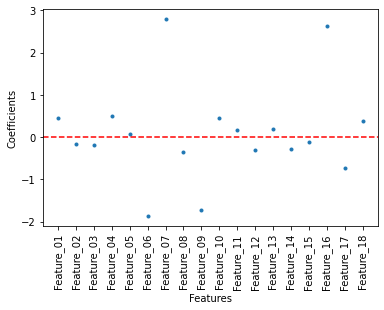

In [ ]:
lr = LinearRegression()
lr.fit(X_scaled,Y)
plt.plot(listColNames, lr.coef_.reshape(18,1), '.')
plt.xticks(rotation = 90)
plt.axhline(y=0, color = 'r', linestyle = 'dashed')
plt.xlabel("Features")
plt.ylabel("Coefficients")

D'après le graph des coefficients, 'risk_level' a une grande dépendance des variables "Feature" 06, 07, 09 et 16. On évalue ensuite la qualité de régression par le calcul de MSE.

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y, lr.predict(X_scaled))

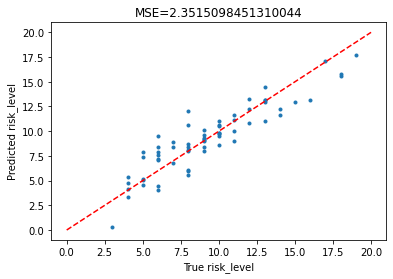

In [ ]:
plt.plot(Y, lr.predict(X_scaled),'.')
ref=np.linspace(0,20,num = 10)
plt.plot(ref, ref, color = 'r', linestyle = 'dashed')
plt.xlabel('True risk_level')
plt.ylabel('Predicted risk_level')
plt.title("MSE="+str(MSE))
plt.show()

Avec le MSE, on a une idée de qualité d'ajustement. Plus MSE est petite, plus le modèle est précis pour la prédiction. Le risque potentiel d'utiliser MSE comme validation est que MSE n'est pas capable de évaluer si le modèle sous ou sur estimer les prédictions. C'est impossible de faire l'analyse de trade-off pour le biais et la variance avec MSE.

### QUESTION 2.2.2
>Évaluez à quel point les prédictions sont stables à l'aide d'une méthode de validation croisée de type 4-folds.

On effectue une validation croisée de type 4-folds pour chaque régression linéaire simple entre 'risk_level' et chacune des variables. Pour évaluer la stabilité de la prédiction, 100 réalisations de 4-folds sont faites. On se concentra sur la fluctuation des sommes de MSE pour ces 100 réalisations.

In [152]:
from sklearn.model_selection import KFold
stock_sum_mse = np.zeros((100,len(listColNames)))
for i in range(100):
  for Col in range(len(listColNames)):
    kf = KFold(n_splits=4, shuffle = True)
    sum_mse_scores = 0.
    for train, test in kf.split(X_scaled[:, Col:Col+1]):
      X_train=X_scaled[:, Col:Col+1][train]
      y_train=Y[train]
      X_test=X_scaled[:, Col:Col+1][test]
      y_test=Y[test]
      lr = LinearRegression()
      lr.fit(X_train,y_train)
      y_pred = lr.predict(X_test)
      mse_score = mean_squared_error(y_test, y_pred)
      sum_mse_scores+=mse_score
    stock_sum_mse[i][Col]=sum_mse_scores

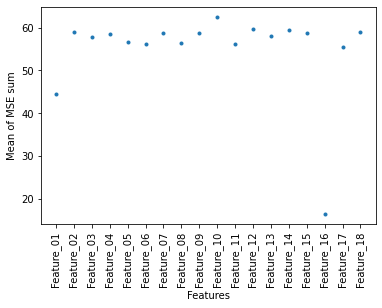

Text(0, 0.5, 'Standard deviation of MSE sum')

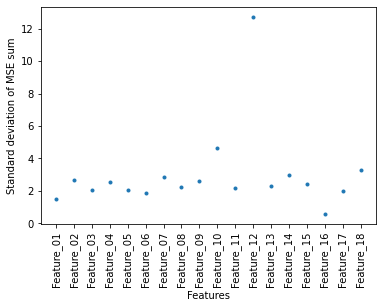

In [169]:
mean_stock_sum_mse = np.zeros(len(listColNames))
sd_stock_sum_mse = np.zeros(len(listColNames))
for Col in range(len(listColNames)):
  mean_stock_sum_mse[Col] = np.mean(stock_sum_mse[:,Col])
  sd_stock_sum_mse[Col] = np.power(np.var(stock_sum_mse[:,Col]),0.5)
plt.plot(listColNames,mean_stock_sum_mse,'.')
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Mean of MSE sum")
plt.show()
plt.plot(listColNames,sd_stock_sum_mse,'.')
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Standard deviation of MSE sum")

Après avoir effectué la validation croisée de K-fold, on peut évaluer la stabilité de la prédiction selon l'écart type de somme de MSE. On constate que pour la variable 'Feature_12', l'écart type est très élevé qui montre l'instabilité de la prédiction issue de cette variable. La variable 'Feature_16' a un écart type plus petit, donc une prédiction plus stable.

Dans la partie suivante, on analyse la stabilité de prédiction issue de la régression linéaire multiple:

The mean of sum_MSE of 100 times K-fold validation is 24.296454710337
The standard deviation of sum_MSE of 100 times K-fold validation is 3.9213926523857277


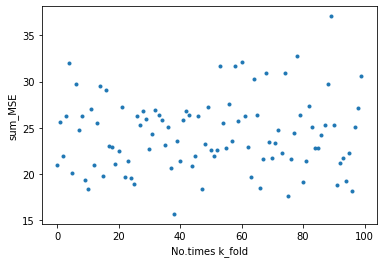

In [ ]:
from sklearn.model_selection import KFold
list_sum_mse = []
for i in range(100):
  kf = KFold(n_splits=4, shuffle = True);
  sum_mse_scores=0.
  for train, test in kf.split(X_scaled):
      X_train=X_scaled[train]
      y_train=Y[train]
      X_test=X_scaled[test]
      y_test=Y[test]
      lr = LinearRegression()
      lr.fit(X_train,y_train)
      y_pred = lr.predict(X_test)
      mse_score = mean_squared_error(y_test, y_pred)
      sum_mse_scores+=mse_score
  list_sum_mse.append(sum_mse_scores)
plt.plot(range(100),list_sum_mse,'.')
plt.xlabel('No.times k_fold')
plt.ylabel('sum_MSE')
print("The mean of sum_MSE of 100 times K-fold validation is "+str(np.mean(list_sum_mse)))
print("The standard deviation of sum_MSE of 100 times K-fold validation is "+str(np.power(np.var(list_sum_mse),0.5)))

L'écart type de la somme de MSE est assez important par rapport à sa valeur moyenne. On dit que la prédiction en utilisant une régression linéaire multiple avec toutes les données n'est pas assez stable.

###QUESTION 2.2.3
>Peut-on enfin dire si on observe une relation significative entre 'Risk_level' et (independament) 'Feature_01', 'Feature_07' ou bien 'Feature_16'. On peut le valider à l'aide d'un test d'hypothèse dont on décrira la procédure.


Pour dire si on observe une relation significative entre 'risk_level' et Feature 01, 07 ou 16 indépendemment, on construit un test d'hypothèse. L'hypothèse nulle est le coefficient est nul, c'est-à-dire, $b_1=0$. La statistique du test est F de Fisher:
$$F=\frac{SCE}{SCR/(n-2)}$$ $F$ suit la loi de Fisher à (1, n − 2) degré de liberté. Avec $$SCE = \sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2$$ et $$SCR = \sum_{i=1}^{n}e_i^2$$

Pour Feature 01, on calcul F et la valeur de p:

In [185]:
import scipy
lr=LinearRegression()
lr.fit(X_scaled[:,0:1],Y)
SCE = np.sum(np.power(lr.predict(X_scaled[:,0:1])-np.mean(Y),2))
SCR = np.sum(np.power(lr.predict(X_scaled[:,0:1])-Y,2))
F = SCE/(SCR/(len(Y)-2))
p_value = scipy.stats.f.sf(F, 1, len(Y)-2)
p_value

5.1305027837326144e-05

Comme p_value est inférieure à 0,001, on peut conclure que l'hypothèse nulle est rejetée avec une confidence statistique de 99.9%. **Il existe une relation significative entre Feature 01 et risk_level.**

Pour Feature 07, on calcul F et la valeur de p:

In [186]:
import scipy
lr=LinearRegression()
lr.fit(X_scaled[:,6:7],Y)
SCE = np.sum(np.power(lr.predict(X_scaled[:,6:7])-np.mean(Y),2))
SCR = np.sum(np.power(lr.predict(X_scaled[:,6:7])-Y,2))
F = SCE/(SCR/(len(Y)-2))
p_value = scipy.stats.f.sf(F, 1, len(Y)-2)
p_value

0.5905492065328948

Comme p_value est plus grande que 0,05, on peut conclure que l'hypothèse nulle ne peut pas être rejetée avec une confidence statistique 95%. **Il n'existe pas une relation significative entre Feature 07 et risk_level.**

Pour Feature 16, on calcul F et la valeur de p:

In [187]:
import scipy
lr=LinearRegression()
lr.fit(X_scaled[:,15:16],Y)
SCE = np.sum(np.power(lr.predict(X_scaled[:,15:16])-np.mean(Y),2))
SCR = np.sum(np.power(lr.predict(X_scaled[:,15:16])-Y,2))
F = SCE/(SCR/(len(Y)-2))
p_value = scipy.stats.f.sf(F, 1, len(Y)-2)
p_value

3.1624860150065374e-19

Comme p_value est inférieure à 0,001, on peut conclure que l'hypothèse nulle est rejetée avec une confidence statistique de 99.9%. **Il existe une relation significative entre Feature 16 et risk_level.**

## QUESTION 2.3
> On s'intéresse maintenant au lien entre la variable 'Risk_level' et 'Feature_12'. On peut remarquer que ces donnees contiennent deux valeurs aberrantes.

### QUESTION 2.3.1
> Définissez une procedure pour detecter automatiquement deux donnees aberrantes dans un jeu de donnees.

On peut d'abord appeler la fonction describe() et dessiner un histogramme pour explorer les données. La valeur moyenne de "Feature_12" est de -2,978, mais la valeur minimale atteint -10.8. L'histogramme peut également montrer intuitivement qu'il existe deux donnees aberrantes. 

       Feature_12
count   66.000000
mean    -2.978653
std      1.904327
min    -10.828537
25%     -3.627035
50%     -2.815750
75%     -1.666581
max      0.045798


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e4bc06c88>]],
      dtype=object)

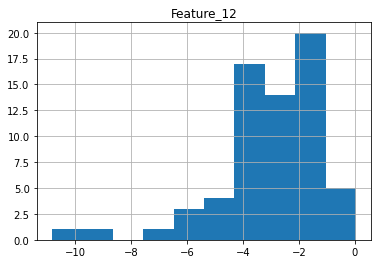

In [ ]:
print(dataframe[['Feature_12']].describe())
dataframe[['Feature_12']].hist()

On peut aussi utiliser le boxplot pour détecter les données aberrantes: les points en dehors de l'intervalle interquartile du boxplot sont des données aberrantes.

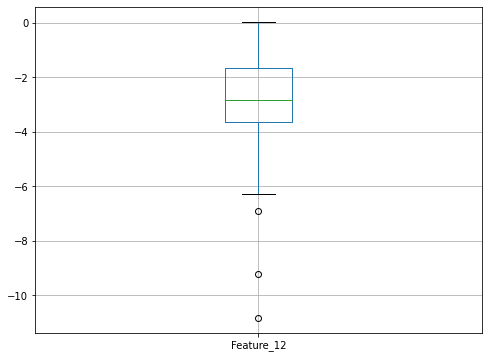

In [ ]:
f,ax=plt.subplots(figsize=(8,6))
dataframe[['Feature_12']].boxplot('Feature_12',ax=ax)
plt.show()

Afin d'automatiser la procédure de détection des données abberantes, on utilise les distances de Cook.  

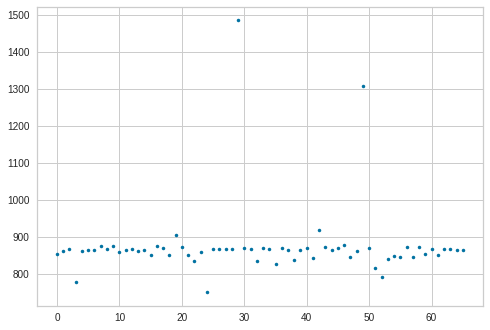

In [303]:
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(Y)
n = len(X_scaled[:,11:12])
lr = LinearRegression()
lr.fit(X_scaled[:,11:12], Y_scaled)
Y_pred = lr.predict(X_scaled[:,11:12])
s2=np.sum((Y_scaled-Y_pred)**2)/(n-1)
list_Cook = np.zeros(len(X_scaled[:,11:12]))
for i in range(len(X_scaled[:,11:12])):
  x_del_i = np.delete(X_scaled[:,11:12],i)
  y_del_i = np.delete(Y_scaled,i)
  lr.fit(x_del_i[:,np.newaxis],y_del_i)
  sum_squared_error=np.sum((Y_pred-lr.predict(X_scaled[:,11:12]))**2)
  D_cook = sum_squared_error/(2.*s2)
  list_Cook[i] = D_cook
plt.plot(list_Cook,'.')

On constate que dans le graph de distance de Cook, il existe deux points pour lesquelles la distance est beaucoup plus importantes que les autres. C'est donc deux points aberrants. Avec la distance de Cook, on pourrait bien définir un seuil pour identifier les points aberrants. 

In [305]:
np.where(list_Cook>1000)

(array([29, 49]),)

On a localisé les points aberrants par ce seuil imposé pour la distance de Cook. Les points aberrants se situent sur l'indice 29 et 49.

### QUESTION 2.3.2
>Nous supprimerons dans la suite de cet exercice les deux observations qui sont aberrantes sur la variable 'Feature_12', et enregistre les données restantes dans une nouvelle dataframe_new.

       Feature_12
count   64.000000
mean    -2.758630
std      1.448414
min     -6.893747
25%     -3.514308
50%     -2.810350
75%     -1.643383
max      0.045798


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e4bccf5f8>]],
      dtype=object)

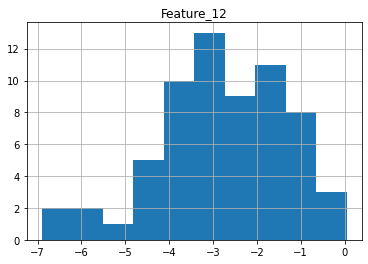

In [ ]:
dataframe_new = dataframe.loc[dataframe['Feature_12'] > -8]

print(dataframe_new[['Feature_12']].describe())
dataframe_new[['Feature_12']].hist()

On propose une autre méthode ici. On pourrait utiliser les indices trouvé en calculant les distances de Cook. On supprime alors les deux points qui se situent sur l'indice 29 et 49.

In [309]:
Feature12_new = np.delete(X[:,11:12],[29,49])

> Comment auriez-vous traite ces observations si vous aviez absolument voulu preserver l'information qu'elles contiennent dans les autres variables ?

Si on veut garder ces informations, on pourrait compléter ces valeurs aberrantes par la moyenne des valeurs de Feature_12 qui se situent sur les lignes adjacentes.

## QUESTION 2.4
> Une fois les deux observations aberrantes de 'Feature_12' supprimees, on souhaite selectionner les variables de 'X' qui permettent de prédire au mieux 'Risk_level' a l'aide de la regression multiple regularisee.

### QUESTION 2.4.1
> Quelle strategie vous semble la plus appropriee pour selectionner les variables les plus pertinentes ? Quel pretraitement allez-vous de meme effectuer sur les donnees.

Nous pouvons utiliser le modèle de régression Lasso pour analyser toutes les variables. Les variables dont les poids ne sont pas nulls sont celles les plus pertinentes et sont ce que nous voulons.
<br>Avant cela , il faut faire centrer et réduire les variables pour qu'elles soient dans la même échelle.

In [ ]:
from sklearn.linear_model import Lasso

X_scaled = preprocessing.scale(X)

lasso_regressor=Lasso(alpha=4.88, fit_intercept=True)
lasso_regressor.fit(X_scaled,Y)

print('Beta values :')
for Col in range(len(listColNames)):
  print('-> '+listColNames[Col]+': '+str(lasso_regressor.coef_[Col]))

Beta values :
-> Feature_01: 0.0
-> Feature_02: 0.0
-> Feature_03: 0.0
-> Feature_04: 0.0
-> Feature_05: -0.0
-> Feature_06: -0.0
-> Feature_07: -0.0
-> Feature_08: -0.0
-> Feature_09: -0.0
-> Feature_10: 0.0
-> Feature_11: 0.0
-> Feature_12: -0.0
-> Feature_13: 0.0
-> Feature_14: 0.0
-> Feature_15: 0.0
-> Feature_16: 0.0
-> Feature_17: -0.0
-> Feature_18: -0.0


> D'après le résultat des coefficients de la régression Lasso, on peut constater que les 'Feature_01', 'Feature_12' et 'Feature_16' sont les variables les plus pertinentes pour avoir une corrélation avec le 'Risk_level'.
<br>Leurs poids sont respectivement: 

### QUESTION 2.4.2
> Effectuez la procedure de selection des variables optimales en parametrant a la main le poids entre la qualite de prediction et le niveau de regularisation.

### QUESTION 2.4.3
> Effectuez la procedure automatique de parametrisation de ce poids, de sorte a ce q'un maximum de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale. Quelle methode de validation croisee vous semble la plus raisonnable ici ? La selection des variables est-elle stable ?